EDA and Data Visualisation for Iris Flower Dataset

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
%matplotlib inline

In [4]:
from sklearn.datasets import load_iris 
iris = load_iris()

In [5]:
X = iris.data   

In [6]:
y = iris.target

In [8]:
feature_names = iris.feature_names

In [ ]:
print(feature_names)               ##these are all the independent features

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [10]:
target_names = iris.target_names

In [ ]:
print(target_names)                ##Thse are all the target names

['setosa' 'versicolor' 'virginica']


Creating a dataframe for 'independent features'

In [12]:
X_df = pd.DataFrame(iris.data , columns = iris.feature_names)

In [13]:
X_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Creating a Series for Dependent features

In [14]:
y_series = pd.Series(iris.target ,name = 'species')

In [15]:
y_series

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

Performing Basic EDA for X_df

In [23]:
##Checking column names
X_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [ ]:
##Finding number of rows and columns
X_df.shape

(149, 4)

In [16]:
##Checking for null values
X_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

There are no null values

In [17]:
##Checking for duplicated values
X_df.duplicated().sum()

1

In [ ]:
X_df[X_df.duplicated()]             ##The following is the duplicated value

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
142,5.8,2.7,5.1,1.9


In [19]:
X_df = X_df.drop_duplicates()

In [20]:
X_df.duplicated().sum()

0

In [21]:
##Checking besic info 
X_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  149 non-null    float64
 1   sepal width (cm)   149 non-null    float64
 2   petal length (cm)  149 non-null    float64
 3   petal width (cm)   149 non-null    float64
dtypes: float64(4)
memory usage: 5.8 KB


In [22]:
##Finding Statistical values
X_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631
std,0.830851,0.436342,1.767791,0.762622
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [25]:
##Checking corrrelation between independent features
X_df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.118129,0.873738,0.820620
sepal width (cm),-0.118129,1.000000,-0.426028,-0.362894
petal length (cm),0.873738,-0.426028,1.000000,0.962772
petal width (cm),0.820620,-0.362894,0.962772,1.000000


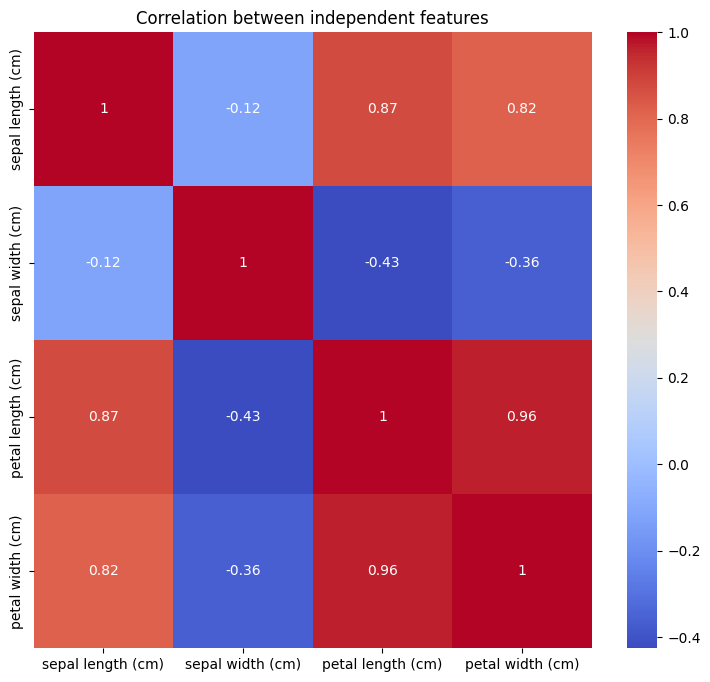

In [27]:
plt.figure(figsize = (9,8))
sns.heatmap(X_df.corr() , annot = True , cmap= 'coolwarm')
plt.title('Correlation between independent features')
plt.show()

Plotting Histogram and KDE plots for each column in X_df

In [34]:


def distribution_plots(X):
    for col in X.columns:
        plt.figure(figsize = (9,8))
        sns.histplot(X[col], kde=True)
        plt.title('Histplot for independent features')
        plt.tight_layout()  
        plt.show()



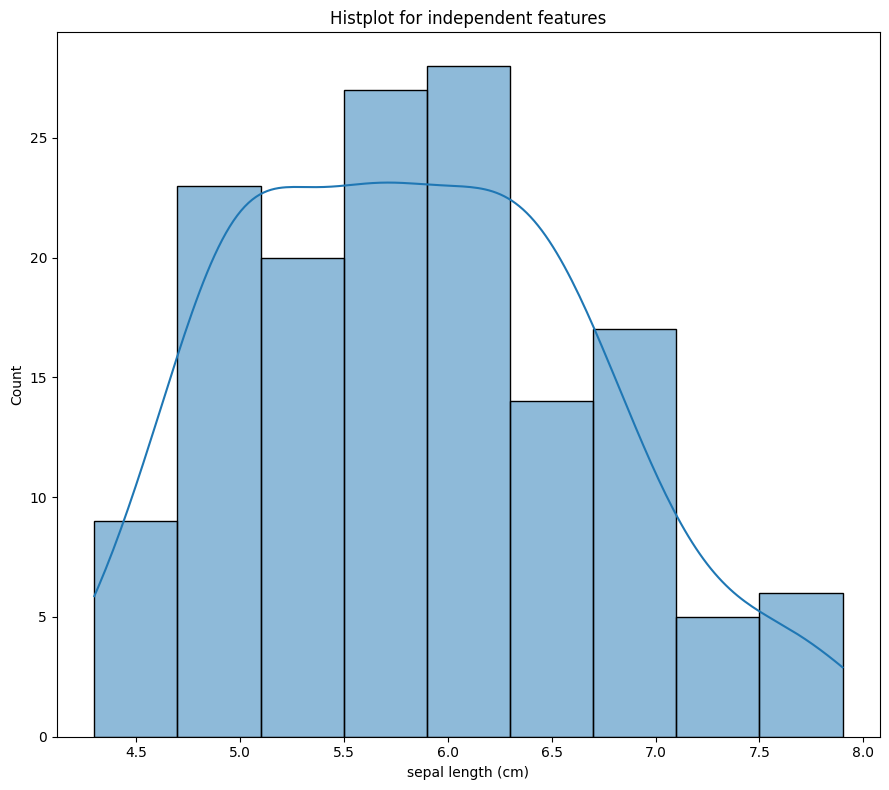

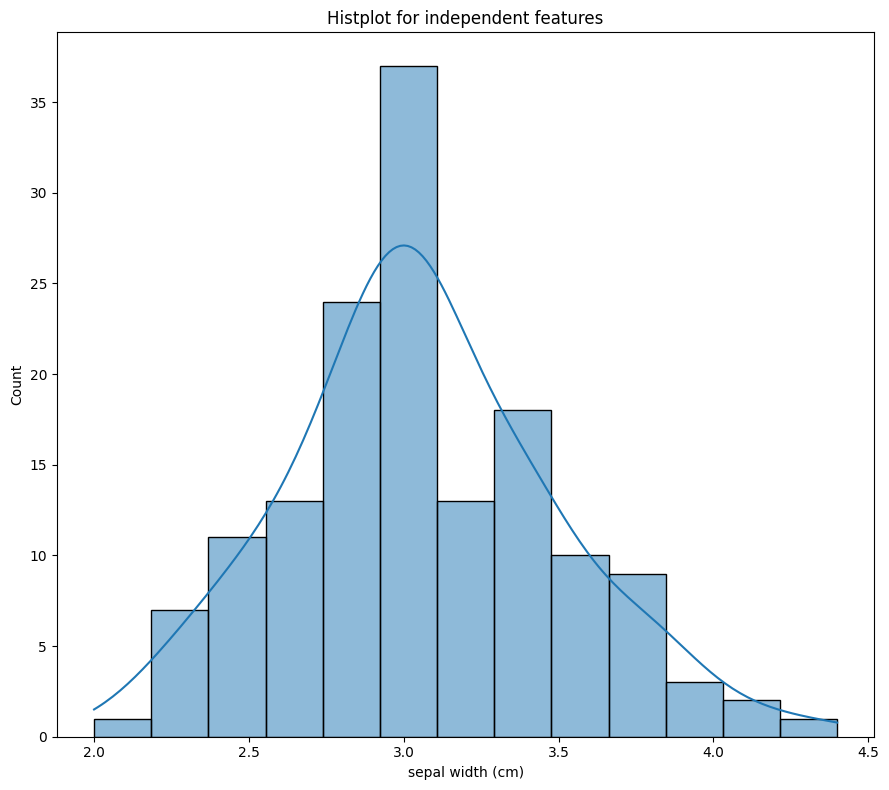

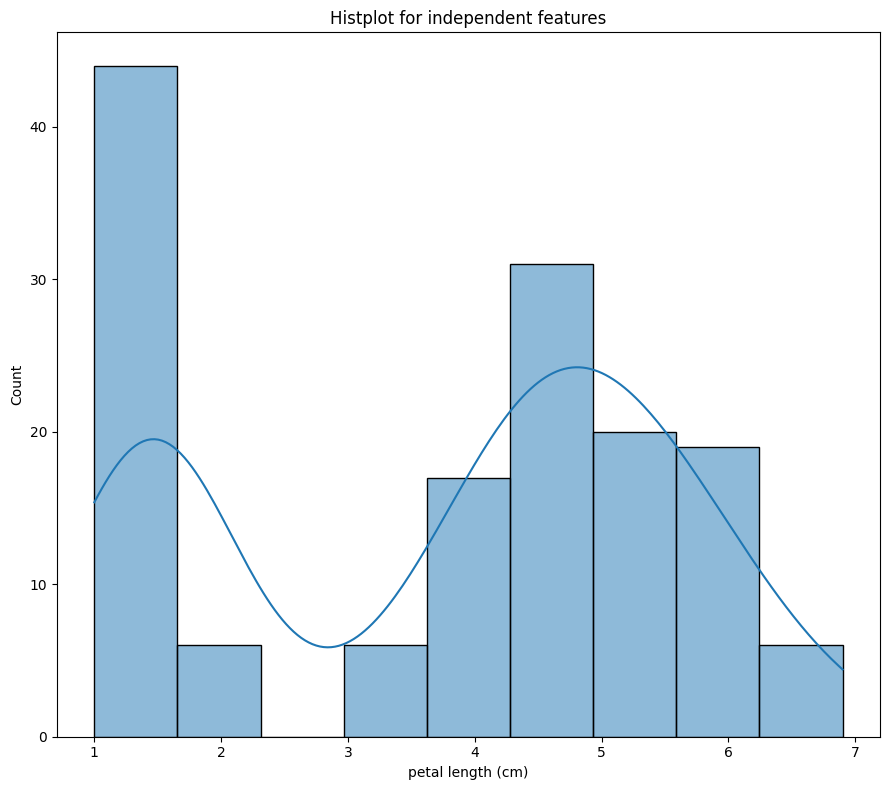

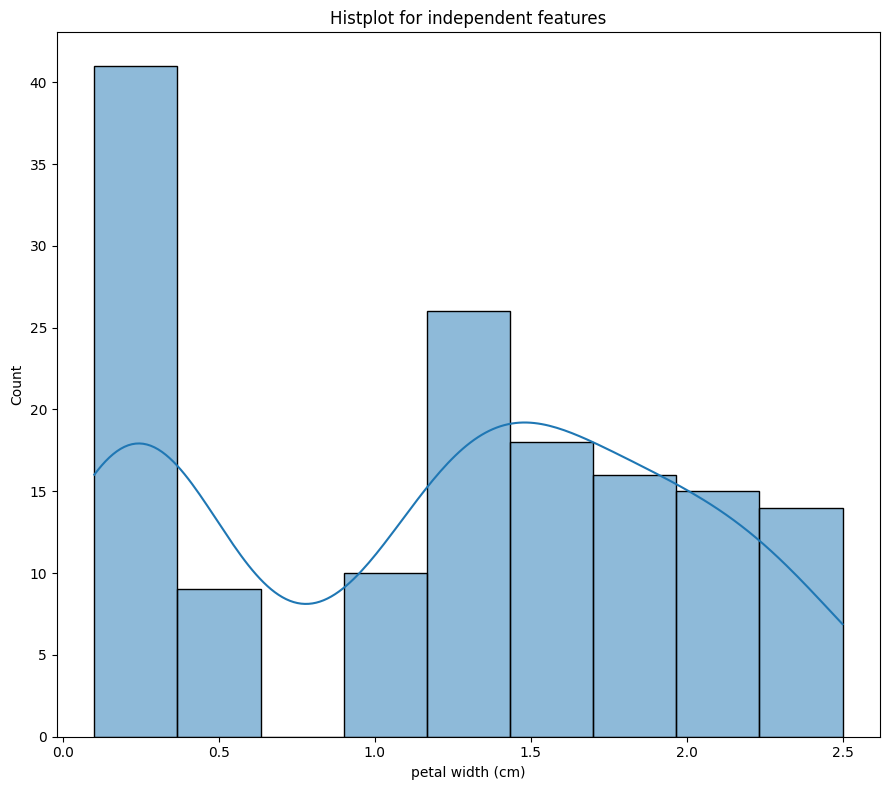

In [35]:
distribution_plots(X_df)

Scatter plot

In [37]:
X_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

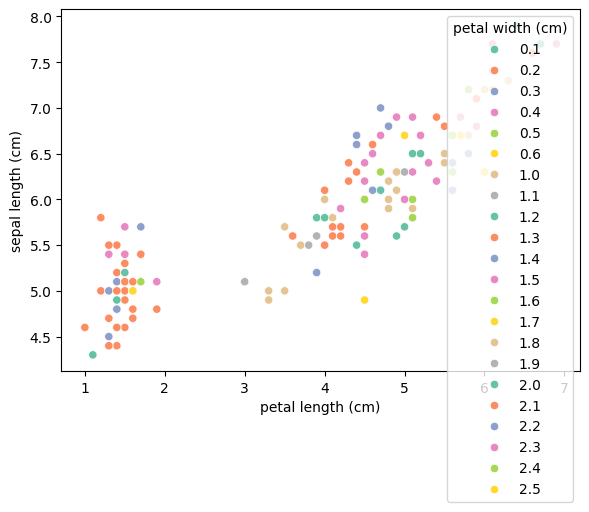

In [41]:
plt.figure(figsize = (6,5))
sns.scatterplot(x ='petal length (cm)', y = 'sepal length (cm)' ,hue = 'petal width (cm)',palette = 'Set2', data = X_df)
plt.tight_layout()
plt.show()

<Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>

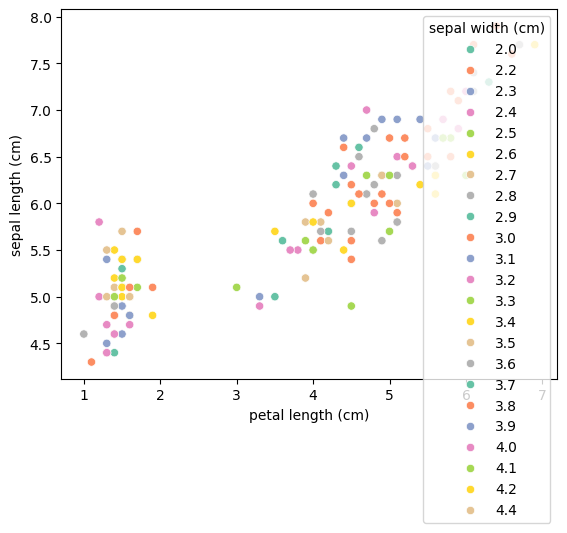

In [46]:
sns.scatterplot(x ='petal length (cm)', y = 'sepal length (cm)' ,hue = 'sepal width (cm)',palette = 'Set2', data = X_df)

In [42]:
X_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

<Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>

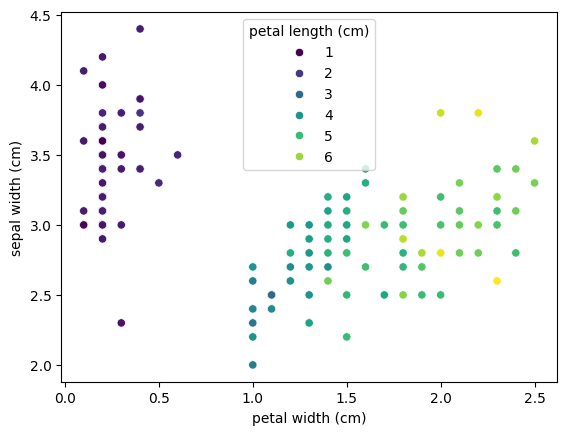

In [43]:
sns.scatterplot(x = 'petal width (cm)' , y = 'sepal width (cm)' ,hue = 'petal length (cm)' , palette = 'viridis' , data = X_df)

<Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>

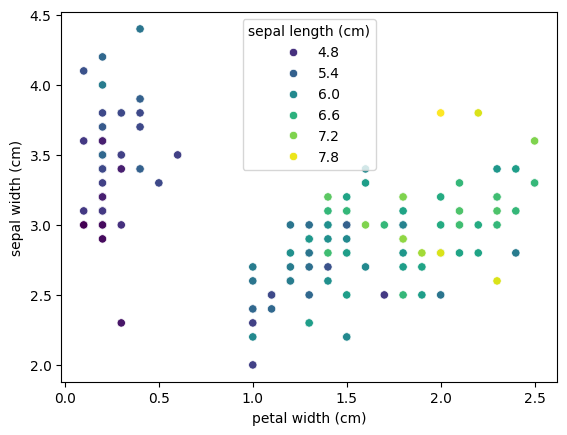

In [45]:
sns.scatterplot(x = 'petal width (cm)' , y = 'sepal width (cm)' ,hue = 'sepal length (cm)' , palette = 'viridis' , data = X_df)

Pairplot

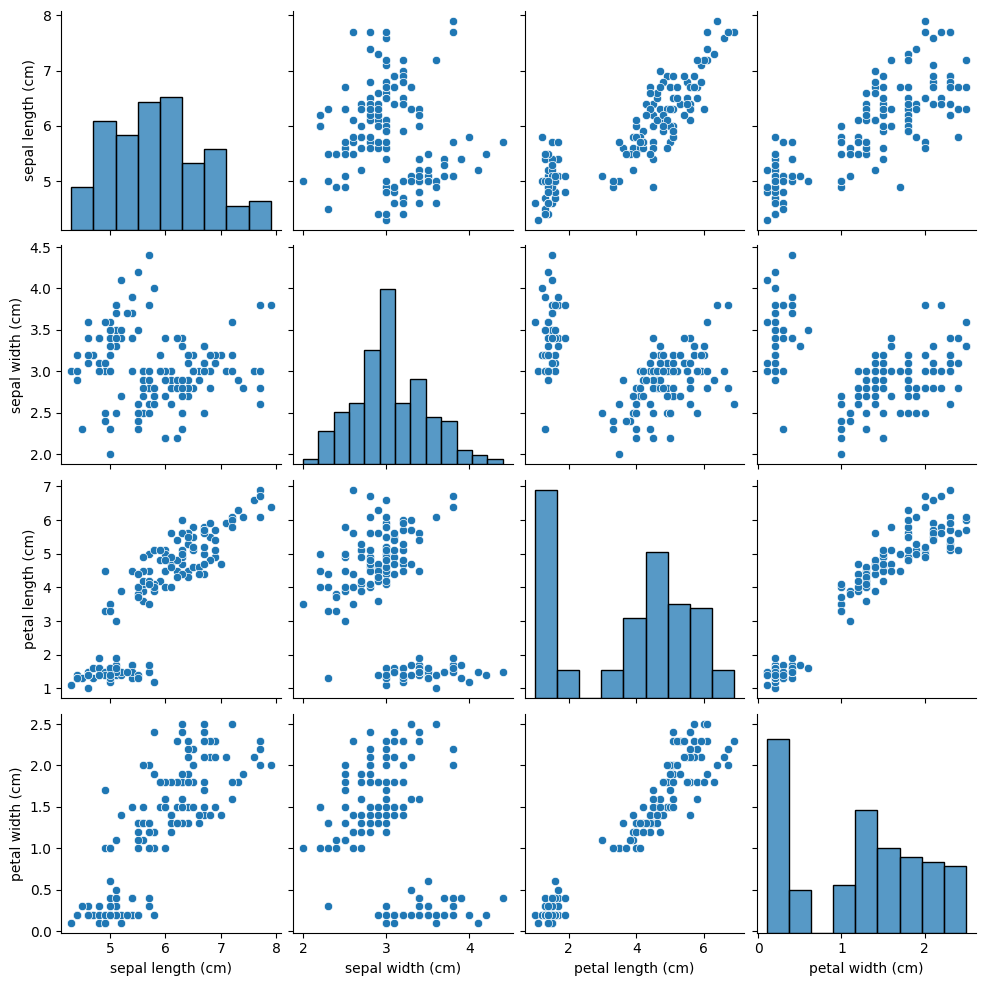

In [50]:
sns.pairplot(X_df)